## PyTorch Workflow
1. Data(Prepare and load)
2. Build Model
3. Fitting the model to data (Training)
4. Making predictions and evaluating a model
5. Saving and loading a model

In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [5]:
device = 'cuda' if torch.cuda.is_available() else "cpu"

## 1. Data (Preparing and loading)
Machine Learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

In [9]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [10]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Splitting data into training and test sets

In [19]:
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

## Visualize the data

In [31]:
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None
                     ):
    plt.figure(figsize=(10,7))
    #plot train data
    plt.scatter(train_data, train_labels, c='r', s=5, label="Training data")

    #plot test data
    plt.scatter(test_data, test_labels, c='g', s=5, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c='b', s=5, label="Predicted data")

    # legends
    plt.legend(prop={"size":14})

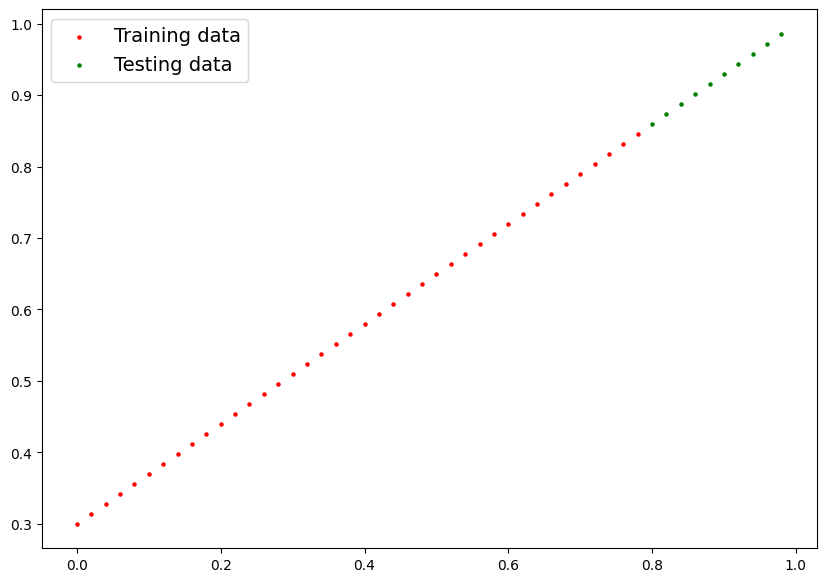

In [32]:
plot_predictions()

## Creating Linear Model

In [33]:
class LinearRegressionModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad = True,
                                                dtype = torch.float32
                                                ))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype= torch.float32))

    # method to define computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
